In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('imgs/T_C09-1C2025_demo3_carpincho.jpg')

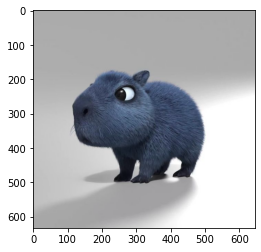

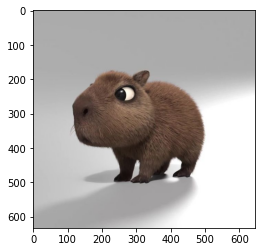

In [3]:
plt.imshow(img)                                     # sin corrección RGB
plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    # con corrección RGB
plt.show()

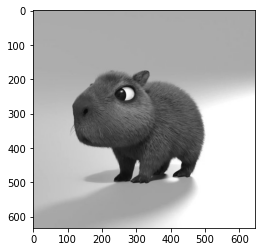

In [4]:
# transformo a escala de grises

img_bn = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img_bn, cv2.COLOR_BGR2RGB))
plt.show()

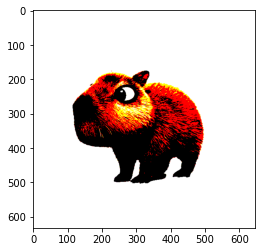

In [5]:
# ¿que pasa si binarizo sobre la imagen a color?

_, img_th = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(img_th, cv2.COLOR_BGR2RGB))
plt.show()

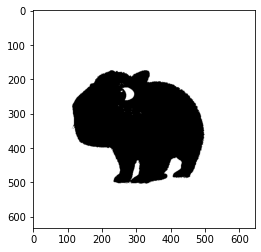

In [6]:
# entonces binarizo sobre la imagen en escala de grises

_, img_th = cv2.threshold(img_bn, 150, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(img_th, cv2.COLOR_BGR2RGB))
plt.show()

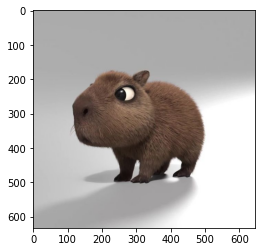

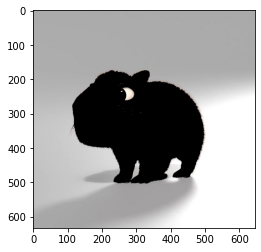

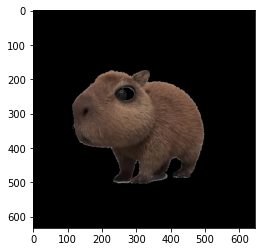

In [7]:
# uso máscaras en operaciones lógicas ...

# sin máscara
img_mask = cv2.bitwise_or(img, img)
plt.imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))
plt.show()

# con máscara
img_mask = cv2.bitwise_or(img, img, mask=img_th)
plt.imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))
plt.show()

# con la mascara invertida
img_mask = cv2.bitwise_or(img, img, mask=cv2.bitwise_not(img_th))
plt.imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))
plt.show()


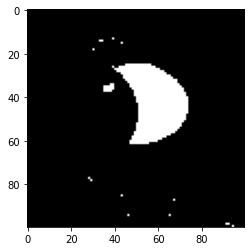

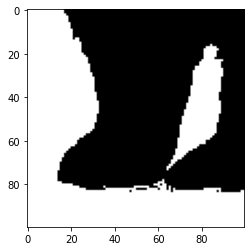

In [8]:
# si recorto y ciertas porciones de la imagen binarizada ...

plt.imshow(cv2.cvtColor(img_th[200:300,220:320], cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_th[420:520,220:320], cv2.COLOR_BGR2RGB))
plt.show()

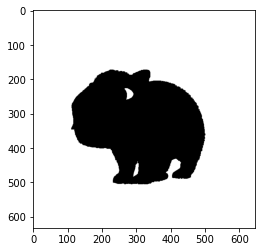

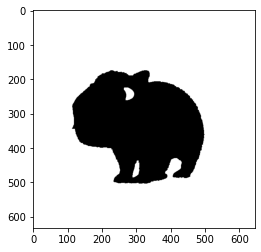

In [9]:
# entonces aplico operaciones morfológicas ...

kernel = np.ones((5, 5), np.uint8)

# erosión
img_b = cv2.erode(img_th, kernel, iterations = 1)
plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
plt.show()

# dilatación 
img_c = cv2.dilate(img_b, kernel, iterations = 1)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# con lo anterior puedo generar los contornos

cont, _ = cv2.findContours(cv2.bitwise_not(img_c), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("cantidad de contornos encontrados: ", len(cont))

# probar que pasa si en lugar de utilizar la imagen con operaciones morfológicas (img_c) utilizo unicamente la binarizada (img_th)...

cantidad de contornos encontrados:  1


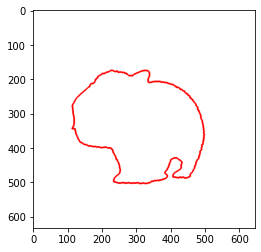

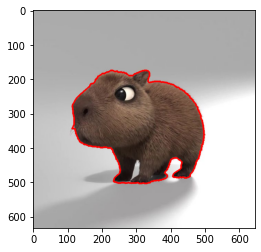

In [11]:
# dibujo los contornos

img_cont = img.copy()                               # copio la imagen original

img_white = np.ones((633,645,3), dtype = np.uint8)  # genero un lienzo en blanco
img_white = 255*img_white        

cv2.drawContours(img_cont, cont, -1, (0,0,255), 3)  # dibujo los contornos en la imagen original

cv2.drawContours(img_white, cont, -1, (0,0,255), 3) # dibujo los contornos en la imagen en blanco

plt.imshow(cv2.cvtColor(img_white, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB))
plt.show()


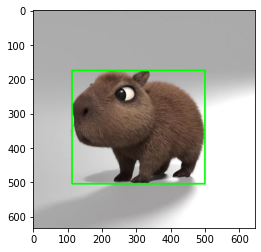

In [12]:
# finalmente, genero los BBs

img_bb = img.copy()                 # copio la imagen original

for c in cont: 
    if cv2.contourArea(c) > 5:                                          # calculo el area para evitar detectar objetos pequeños
        x, y, w, h = cv2.boundingRect(c)                                # genero las coordenadas del BB
        cv2.rectangle(img_bb, (x, y), (x + w, y + h), (0, 255, 0), 3)   # dibujo el BB

plt.imshow(cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB))
plt.show()

### ¿Qué pasa si aplico el mismo algoritmo a otra imagen?

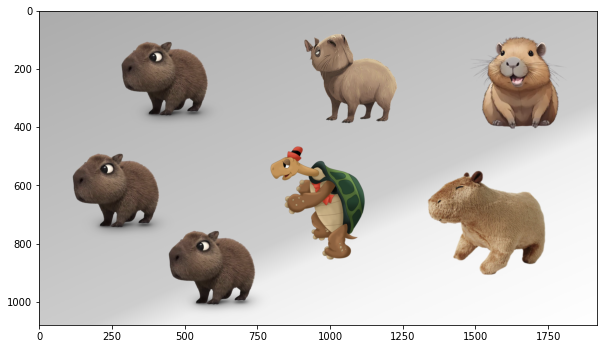

In [13]:
img2 = cv2.imread('imgs/T_C09-1C2025_demo3_animales.png')

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

objetos encontrados:  48
objetos dibujados:  7


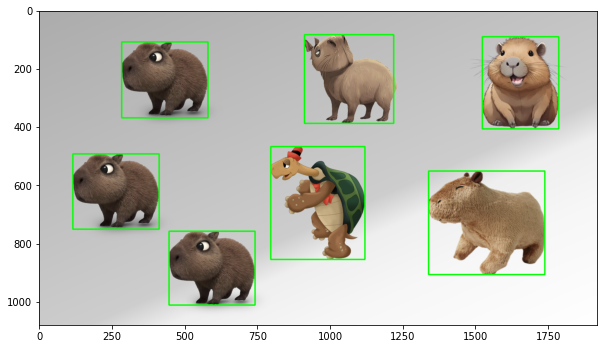

In [14]:
img2_bn = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

_, img2_th = cv2.threshold(img2_bn, 150, 255, cv2.THRESH_BINARY)

img2_b = cv2.erode(img2_th, kernel, iterations = 1)

img2_c = cv2.dilate(img2_b, kernel, iterations = 1)

c2, _ = cv2.findContours(cv2.bitwise_not(img2_c), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("objetos encontrados: ", len(c2))

img2_w = img2.copy()

d = 0
for c in c2: 
    if cv2.contourArea(c) > 100:
        d += 1
        x, y, w, h = cv2.boundingRect(c) 
        cv2.rectangle(img2_w, (x, y), (x + w, y + h), (0, 255, 0), 3)

print("objetos dibujados: ", d)
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img2_w, cv2.COLOR_BGR2RGB))
plt.show()
